In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.preprocessing import StandardScaler

In [2]:
train_data = pd.read_csv('train1.csv')
test_data = pd.read_csv('test1.csv')

In [3]:
train_data.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


In [4]:
train_data['SQUARE_FT'] = train_data['SQUARE_FT'].astype(int)

In [5]:
train_data.describe()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
count,29451.000000,29451.000000,29451.000000,2.945100e+04,29451.000000,29451.000000,29451.000000,29451.000000,29451.000000
mean,0.179756,0.317918,2.392279,1.980187e+04,0.820244,0.929578,21.300255,76.837695,142.898746
std,0.383991,0.465675,0.879091,1.901335e+06,0.383991,0.255861,6.205306,10.557747,656.880713
min,0.000000,0.000000,1.000000,3.000000e+00,0.000000,0.000000,-37.713008,-121.761248,0.250000
25%,0.000000,0.000000,2.000000,9.000000e+02,1.000000,1.000000,18.452663,73.798100,38.000000
50%,0.000000,0.000000,2.000000,1.175000e+03,1.000000,1.000000,20.750000,77.324137,62.000000
75%,0.000000,1.000000,3.000000,1.550000e+03,1.000000,1.000000,26.900926,77.828740,100.000000
max,1.000000,1.000000,20.000000,2.545455e+08,1.000000,1.000000,59.912884,152.962676,30000.000000


In [6]:
train_data.dtypes

POSTED_BY                 object
UNDER_CONSTRUCTION         int64
RERA                       int64
BHK_NO.                    int64
BHK_OR_RK                 object
SQUARE_FT                  int32
READY_TO_MOVE              int64
RESALE                     int64
ADDRESS                   object
LONGITUDE                float64
LATITUDE                 float64
TARGET(PRICE_IN_LACS)    float64
dtype: object

In [7]:
train_data = train_data[train_data['TARGET(PRICE_IN_LACS)'] <= 20000]
train_data = train_data[train_data['SQUARE_FT'] <=600000]
# Extract value after last comma in 'ADDRESS' column
train_data['ADDRESS'] = train_data['ADDRESS'].apply(lambda x: x.rsplit(',', 1)[-1])
# Get value counts of 'ADDRESS' column
address_value_counts = train_data['ADDRESS'].value_counts()

# Filter rows based on value counts
train_data = train_data[train_data['ADDRESS'].isin(address_value_counts[address_value_counts >= 5].index)]

In [8]:
train_data.reset_index(drop=True, inplace=True)

In [9]:
train_data=train_data.dropna()

In [10]:
train_data.isnull().sum()

POSTED_BY                0
UNDER_CONSTRUCTION       0
RERA                     0
BHK_NO.                  0
BHK_OR_RK                0
SQUARE_FT                0
READY_TO_MOVE            0
RESALE                   0
ADDRESS                  0
LONGITUDE                0
LATITUDE                 0
TARGET(PRICE_IN_LACS)    0
dtype: int64

In [11]:
train_data.shape

(29249, 12)

In [12]:
train_data = train_data.loc[:,~train_data.columns.duplicated()]

In [13]:
train_data

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300,1,1,Bangalore,12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275,1,1,Mysore,12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933,1,1,Bangalore,12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929,1,1,Ghaziabad,28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999,0,1,Kolkata,22.592200,88.484911,60.5
...,...,...,...,...,...,...,...,...,...,...,...,...
29244,Owner,0,0,3,BHK,2500,1,1,Agra,27.140626,78.043277,45.0
29245,Owner,0,0,2,BHK,769,1,1,Vapi,39.945409,-86.150721,16.0
29246,Dealer,0,0,2,BHK,1022,1,1,Jaipur,26.928785,75.828002,27.1
29247,Owner,0,0,2,BHK,927,1,1,Chennai,12.900150,80.227910,67.0


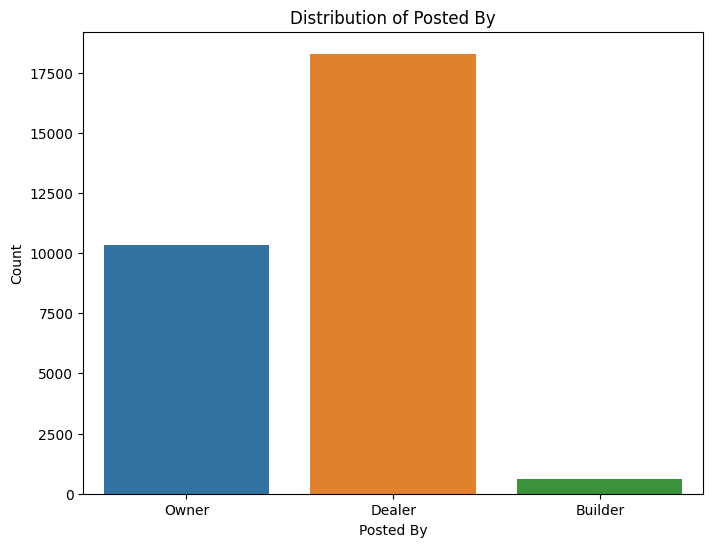

In [14]:
plt.figure(figsize=(8, 6))
sns.countplot(x='POSTED_BY', data=train_data)
plt.title('Distribution of Posted By')
plt.xlabel('Posted By')
plt.ylabel('Count')
plt.show()

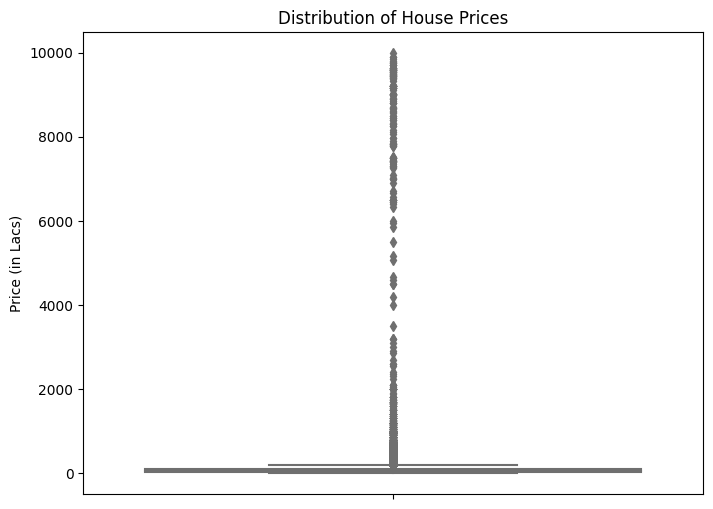

In [15]:
plt.figure(figsize=(8, 6))
sns.boxplot(y='TARGET(PRICE_IN_LACS)', data=train_data, color='skyblue')
plt.title('Distribution of House Prices')
plt.ylabel('Price (in Lacs)')
plt.show()

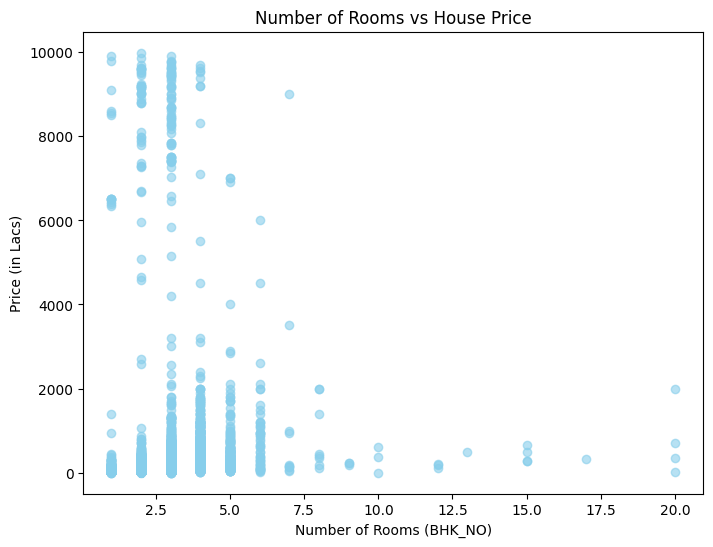

In [16]:
# Scatter plot for 'BHK_NO' vs 'TARGET(PRICE_IN_LACS)'
plt.figure(figsize=(8, 6))
plt.scatter(train_data['BHK_NO.'], train_data['TARGET(PRICE_IN_LACS)'], color='skyblue', alpha=0.6)
plt.title('Number of Rooms vs House Price')
plt.xlabel('Number of Rooms (BHK_NO)')
plt.ylabel('Price (in Lacs)')
plt.show()

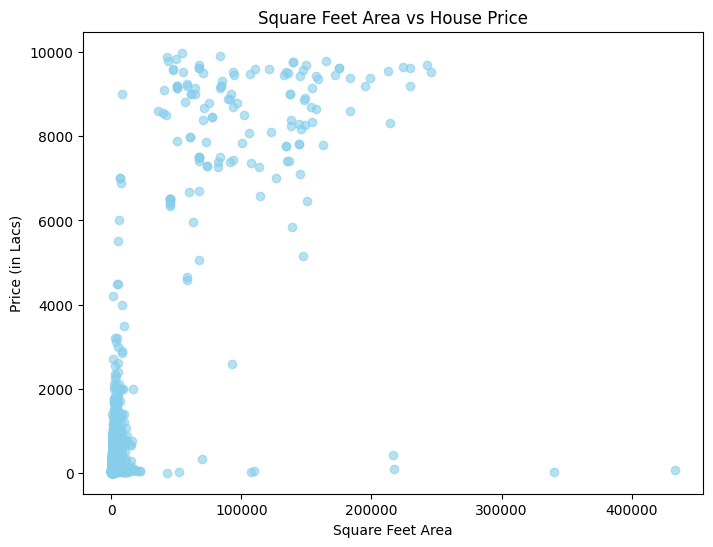

In [17]:
# Scatter plot for 'SQUARE_FT' vs 'TARGET(PRICE_IN_LACS)'
plt.figure(figsize=(8, 6))
plt.scatter(train_data['SQUARE_FT'], train_data['TARGET(PRICE_IN_LACS)'], color='skyblue', alpha=0.6)
plt.title('Square Feet Area vs House Price')
plt.xlabel('Square Feet Area')
plt.ylabel('Price (in Lacs)')
plt.show()


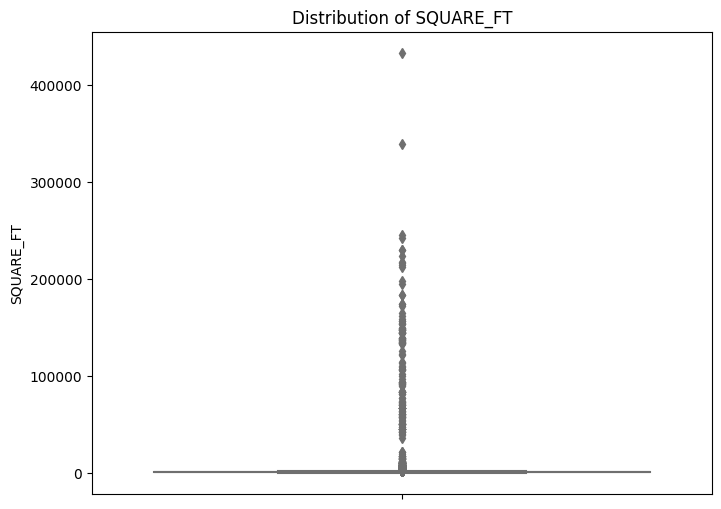

In [18]:
plt.figure(figsize=(8, 6))
sns.boxplot(y='SQUARE_FT', data=train_data, color='skyblue')
plt.title('Distribution of SQUARE_FT')
plt.ylabel('SQUARE_FT')
plt.show()

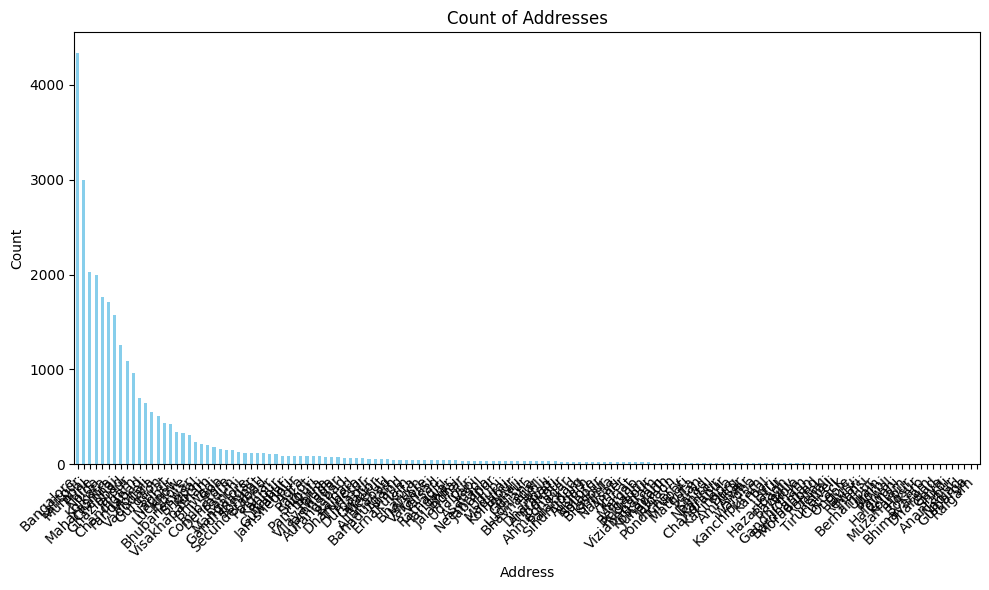

In [19]:
address_counts = train_data['ADDRESS'].value_counts()

# Plot bar plot
plt.figure(figsize=(10, 6))
address_counts.plot(kind='bar', color='skyblue')
plt.title('Count of Addresses')
plt.xlabel('Address')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [20]:
train_data['ADDRESS'].value_counts()

ADDRESS
Bangalore    4337
Lalitpur     2993
Mumbai       2023
Pune         1991
Noida        1767
             ... 
Shirdi          5
Anantapur       5
Nadiad          5
Gulbarga        5
Raigarh         5
Name: count, Length: 146, dtype: int64

In [21]:
train_data.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300,1,1,Bangalore,12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275,1,1,Mysore,12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933,1,1,Bangalore,12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929,1,1,Ghaziabad,28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999,0,1,Kolkata,22.592200,88.484911,60.5


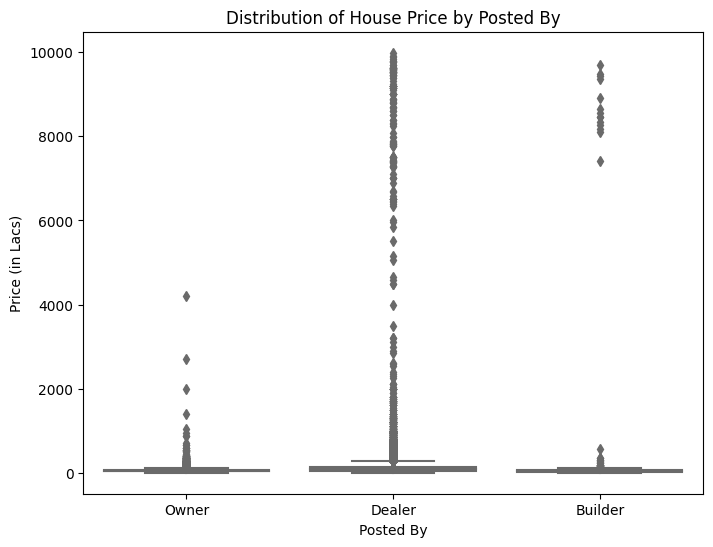

In [22]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='POSTED_BY', y='TARGET(PRICE_IN_LACS)', data=train_data, palette='Set3')
plt.title('Distribution of House Price by Posted By')
plt.xlabel('Posted By')
plt.ylabel('Price (in Lacs)')
plt.show()

In [23]:
train_data = pd.get_dummies(train_data, columns=['POSTED_BY','BHK_OR_RK'])

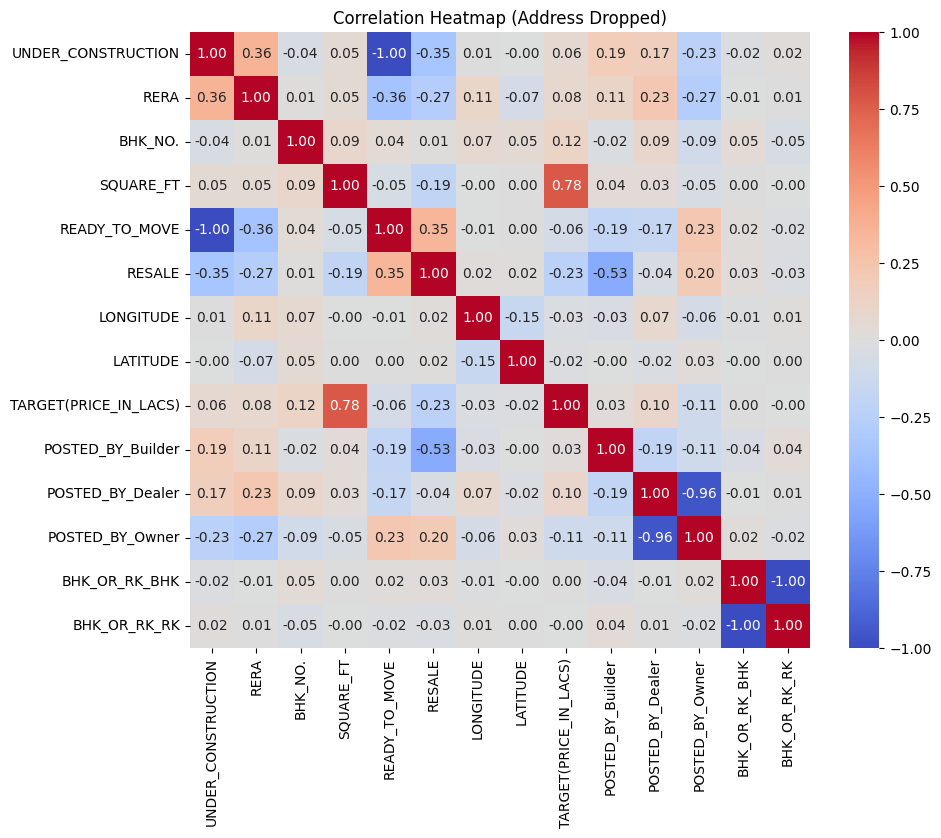

In [24]:
# Drop the 'ADDRESS' column temporarily
train_data_without_address = train_data.drop('ADDRESS', axis=1)

# Draw the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(train_data_without_address.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap (Address Dropped)')
plt.show()


In [25]:
train_data.head()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),POSTED_BY_Builder,POSTED_BY_Dealer,POSTED_BY_Owner,BHK_OR_RK_BHK,BHK_OR_RK_RK
0,0,0,2,1300,1,1,Bangalore,12.969910,77.597960,55.0,False,False,True,True,False
1,0,0,2,1275,1,1,Mysore,12.274538,76.644605,51.0,False,True,False,True,False
2,0,0,2,933,1,1,Bangalore,12.778033,77.632191,43.0,False,False,True,True,False
3,0,1,2,929,1,1,Ghaziabad,28.642300,77.344500,62.5,False,False,True,True,False
4,1,0,2,999,0,1,Kolkata,22.592200,88.484911,60.5,False,True,False,True,False


In [26]:
train_data = pd.get_dummies(train_data, columns=['ADDRESS'])

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_data[['BHK_NO.']] = scaler.fit_transform(train_data[['BHK_NO.']])
train_data[['SQUARE_FT']] = scaler.fit_transform(train_data[['SQUARE_FT']])
train_data[['LONGITUDE']] = scaler.fit_transform(train_data[['LONGITUDE']])
train_data[['LATITUDE']] = scaler.fit_transform(train_data[['LATITUDE']])
train_data.head()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),POSTED_BY_Builder,...,ADDRESS_Udupi,ADDRESS_Ujjain,ADDRESS_Vadodara,ADDRESS_Valsad,ADDRESS_Vapi,ADDRESS_Varanasi,ADDRESS_Vijayawada,ADDRESS_Visakhapatnam,ADDRESS_Vizianagaram,ADDRESS_Wardha
0,0,0,-0.447737,-0.063408,1,1,-1.344440,0.073113,55.0,False,...,False,False,False,False,False,False,False,False,False,False
1,0,0,-0.447737,-0.066276,1,1,-1.456727,-0.017742,51.0,False,...,False,False,False,False,False,False,False,False,False,False
2,0,0,-0.447737,-0.105508,1,1,-1.375424,0.076375,43.0,False,...,False,False,False,False,False,False,False,False,False,False
3,0,1,-0.447737,-0.105967,1,1,1.186292,0.048958,62.5,False,...,False,False,False,False,False,False,False,False,False,False
4,1,0,-0.447737,-0.097937,0,1,0.209340,1.110632,60.5,False,...,False,False,False,False,False,False,False,False,False,False


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

X = train_data.drop(columns=['TARGET(PRICE_IN_LACS)'])
y = train_data['TARGET(PRICE_IN_LACS)']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)

model_dt = DecisionTreeRegressor(random_state=42)
model_dt.fit(X_train, y_train)
y_pred_dt = model_dt.predict(X_test)

model_rf = RandomForestRegressor(random_state=42)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)

def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} Evaluation:")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"R-squared (R2): {r2:.2f}\n")


evaluate_model(y_test, y_pred_lr, "Linear Regression")
evaluate_model(y_test, y_pred_dt, "Decision Tree Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest Regression")


Linear Regression Evaluation:
Mean Absolute Error (MAE): 85.08
Mean Squared Error (MSE): 155227.98
R-squared (R2): 0.54

Decision Tree Regression Evaluation:
Mean Absolute Error (MAE): 36.57
Mean Squared Error (MSE): 23172.04
R-squared (R2): 0.93

Random Forest Regression Evaluation:
Mean Absolute Error (MAE): 29.86
Mean Squared Error (MSE): 17711.56
R-squared (R2): 0.95



In [30]:
from sklearn.model_selection import cross_val_predict


rf_cv = RandomForestRegressor(random_state=42)


y_pred_cv = cross_val_predict(rf_cv, X_train, y_train, cv=5)


mae_cv = mean_absolute_error(y_train, y_pred_cv)
mse_cv = mean_squared_error(y_train, y_pred_cv)
r2_cv = r2_score(y_train, y_pred_cv)

print("k-fold Cross Validation Results:")
print(f"Mean Absolute Error (MAE): {mae_cv:.2f}")
print(f"Mean Squared Error (MSE): {mse_cv:.2f}")
print(f"R-squared (R2): {r2_cv:.2f}")


k-fold Cross Validation Results:
Mean Absolute Error (MAE): 30.74
Mean Squared Error (MSE): 15777.96
R-squared (R2): 0.96


In [31]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)


mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("XGBoost Results:")
print(f"Mean Absolute Error (MAE): {mae_xgb:.2f}")
print(f"Mean Squared Error (MSE): {mse_xgb:.2f}")
print(f"R-squared (R2): {r2_xgb:.2f}")

XGBoost Results:
Mean Absolute Error (MAE): 31.30
Mean Squared Error (MSE): 18116.46
R-squared (R2): 0.95


In [40]:
!pip install --upgrade scikit-optimize
!pip install --upgrade numpy



[notice] A new release of pip is available: 23.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


  Obtaining dependency information for numpy from https://files.pythonhosted.org/packages/3f/6b/5610004206cf7f8e7ad91c5a85a8c71b2f2f8051a0c0c4d5916b76d6cbb2/numpy-1.26.4-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/61.0 kB ? eta -:--:--
     ---------------------------------------- 61.0/61.0 kB 3.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/15.8 MB ? eta -:--:--
   -- ------------------------------------- 1.0/15.8 MB 31.0 MB/s eta 0:00:01
   ---- ----------------------------------- 1.8/15.8 MB 22.4 MB/s eta 0:00:01
   ------- -------------------------------- 3.0/15.8 MB 23.6 MB/s eta 0:00:01
   --------- ------------------------------ 4.0/15.8 MB 22.9 MB/s eta 0:00:01
   ------------ --------------------------- 5.1/15.8 MB 23.4 MB/s eta 0:00:01
   ---------------- ----------------------- 6.4/15.8 MB 23.9 MB/s eta 0:00:01
   ------------------ --------------------- 7.1/15.8 MB 22.8 MB/s eta 0:00:01
   ------------------- ----

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\Shashank Ray\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\~umpy\\.libs\\libopenblas64__v0.3.23-gcc_10_3_0.dll'
Consider using the `--user` option or check the permissions.


[notice] A new release of pip is available: 23.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip
